In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [81]:
# Remplace 'ton_fichier.csv' par le chemin réel de ton fichier
df = pd.read_csv('/Users/mahamatabakarassouna/Documents/Kmeans_Assgnt/Kmeans_FML/Mall_Customers.csv') 

In [82]:
# Affiche les premières lignes pour vérifier
print(df.head())
#print(df.columns)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [83]:
# Assune we want to use 'CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)' as columns.
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1}) # First convert Gender into numerical values (Male, Female = 1, 0).
X = df[['Gender', 'CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values  # transforme in numpy array
X

array([[  0,   1,  19,  15,  39],
       [  0,   2,  21,  15,  81],
       [  1,   3,  20,  16,   6],
       [  1,   4,  23,  16,  77],
       [  1,   5,  31,  17,  40],
       [  1,   6,  22,  17,  76],
       [  1,   7,  35,  18,   6],
       [  1,   8,  23,  18,  94],
       [  0,   9,  64,  19,   3],
       [  1,  10,  30,  19,  72],
       [  0,  11,  67,  19,  14],
       [  1,  12,  35,  19,  99],
       [  1,  13,  58,  20,  15],
       [  1,  14,  24,  20,  77],
       [  0,  15,  37,  20,  13],
       [  0,  16,  22,  20,  79],
       [  1,  17,  35,  21,  35],
       [  0,  18,  20,  21,  66],
       [  0,  19,  52,  23,  29],
       [  1,  20,  35,  23,  98],
       [  0,  21,  35,  24,  35],
       [  0,  22,  25,  24,  73],
       [  1,  23,  46,  25,   5],
       [  0,  24,  31,  25,  73],
       [  1,  25,  54,  28,  14],
       [  0,  26,  29,  28,  82],
       [  1,  27,  45,  28,  32],
       [  0,  28,  35,  28,  61],
       [  1,  29,  40,  29,  31],
       [  1,  

In [84]:
print("Data shape:", X.shape)

Data shape: (200, 5)


In [99]:
class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        # Write your code here
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

    def initialize_centroids(self, X):
      # Write your code here
        centroids = np.random.choice(X.flatten(), (self.K, X.shape[1]), replace=False)
        return centroids
    
    # Compute the distance
    def euclidean_distance(self, a, b):
        return np.sqrt(np.sum((a-b)**2, axis =0))

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize
        # Write your code here
        self.centroids = self.initialize_centroids(X)
        # Optimize clusters
        # Write your code here
        for i in range(self.max_iters):
          self.clusters = self._create_clusters(self.centroids)
          if self.plot_steps:
            self.plot()

        # Classify samples as the index of their clusters
        # Write your code here

          centroids_old = self.centroids
          self.centroids = self._get_centroids(self.clusters)
          if self._is_converged(centroids_old, self.centroids):
            break
        labels = self._get_cluster_labels(self.clusters)

        return labels

    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        # Write your code here
        labels = np.zeros(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
          for sample_index in cluster:
            labels[sample_index] = cluster_idx

        return labels


    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        # Write your code here
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
          centroid_idx = self._closest_centroid(sample, centroids)
          clusters[centroid_idx].append(idx)

        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        # Write your code here
        distances = [self.euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        # Write your code here
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
          cluster
          centroid = np.mean(self.X[cluster], axis=0)
          centroids[cluster_idx] = centroid

        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        # Write your code here
        distances = [self.euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        # Write your code here
        fig, ax = plt.subplots(figsize=(12, 8))

        # Plotting points for each cluster
        for i, cluster in enumerate(self.clusters):
            if len(cluster) > 0:
                points = self.X[cluster]
                ax.scatter(points[:, 0], points[:, 1])

        # Plotting centroids
        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()


In [100]:
Model = KMeans(K = 5, max_iters = 200, plot_steps = True) 


In [101]:
def compute_inertia(X, centroids, Model):
    """
    Compute total intra-cluster variance (inertia).
    """
    inertia = 0.0
    for i in range(len(X)):
        centroid = centroids[Model[i]]
        inertia += np.linalg.norm(X[i] - centroid) ** 2
    return inertia

In [102]:
# PCA algorithm
def pca(X, n_components=2):

    # Standardarise X
    X_std = X - np.mean(X, axis=0)

    # Compute covariance matrix
    cov_mat = np.cov(X_std, rowvar=False)

    # Compute eigenvalues and eigenvectors
    eigenval, eigenvect = np.linalg.eigh(cov_mat)

    # Sort them in descendence order
    sorted_idx = np.argsort(eigenval)[::-1]
    top_eigenvect = eigenvect[:, sorted_idx[:n_components]]

    # Project data X
    X_centered = np.dot(X_std, top_eigenvect)

    return X_centered


In [103]:
X = pca(X, 2)

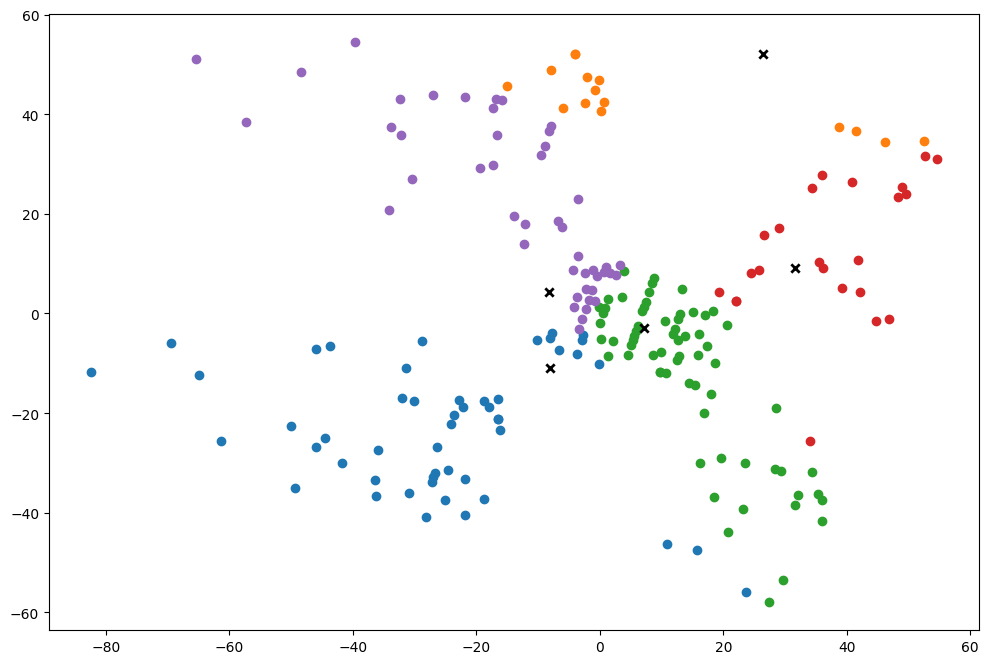

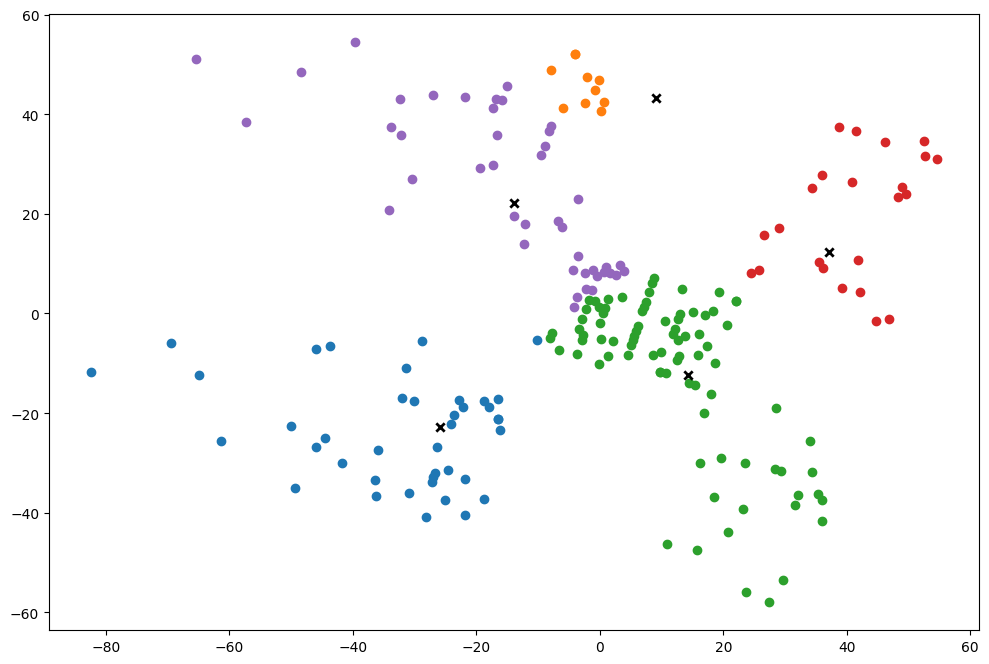

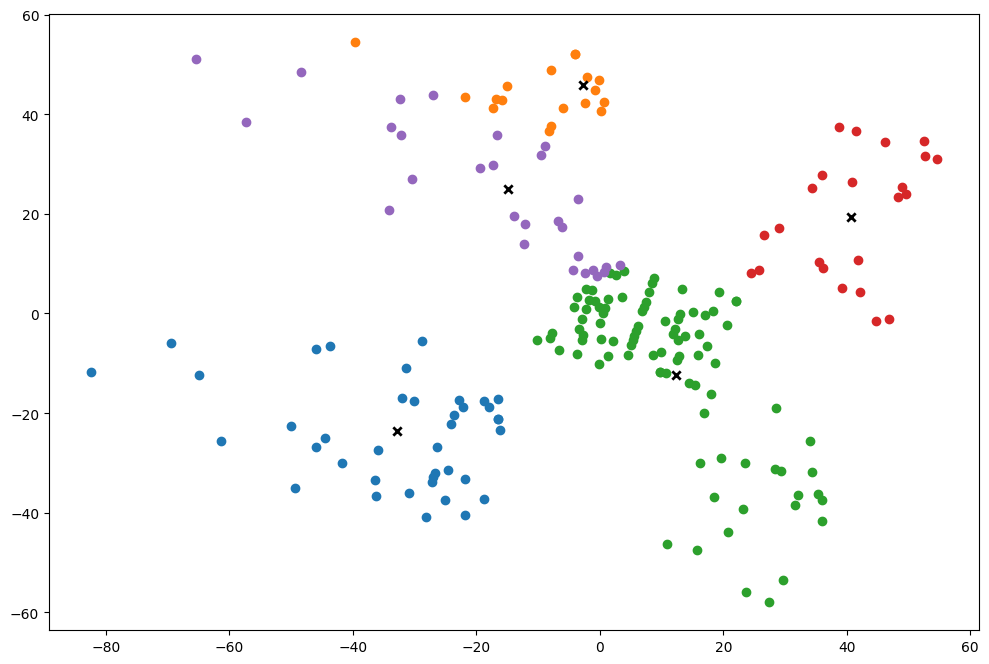

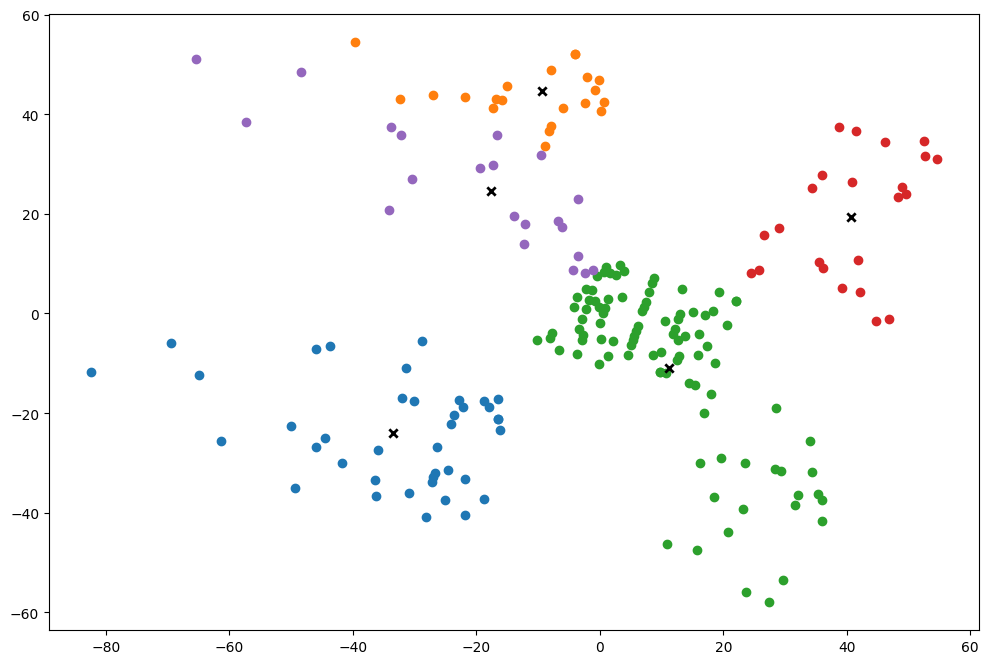

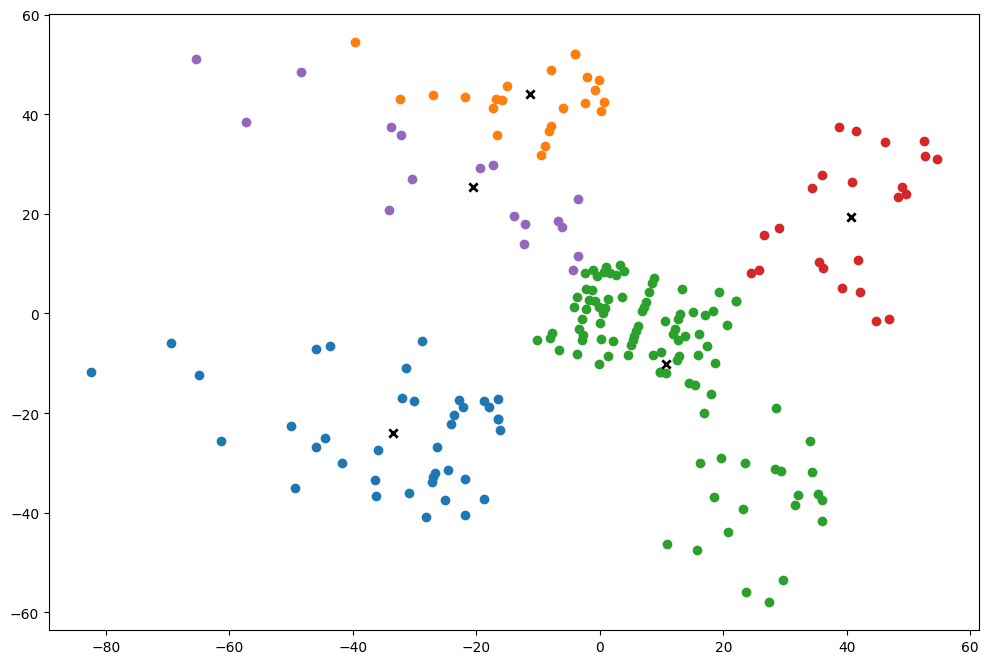

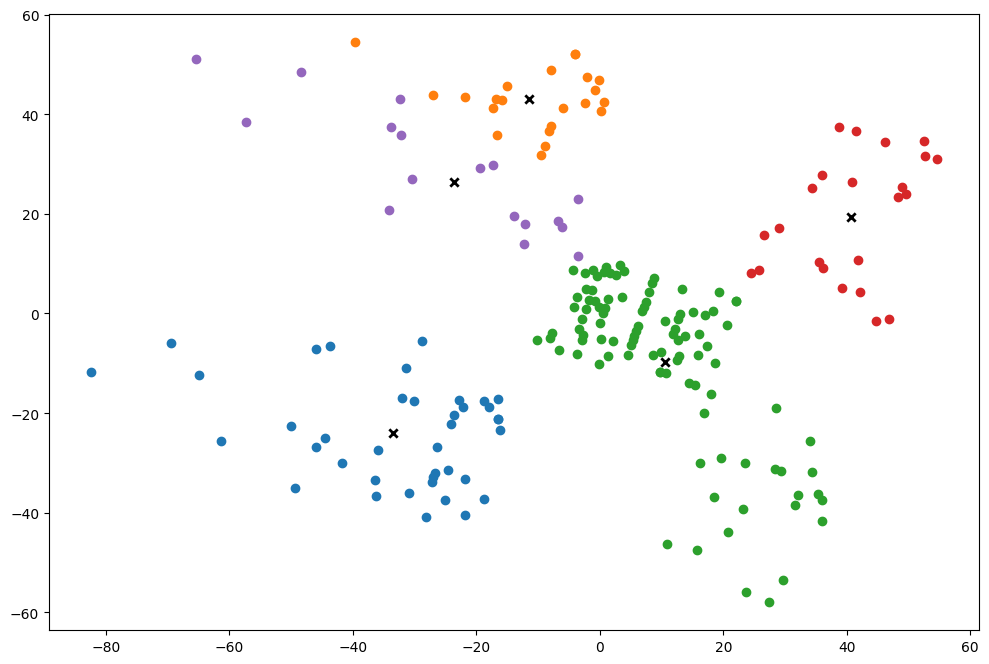

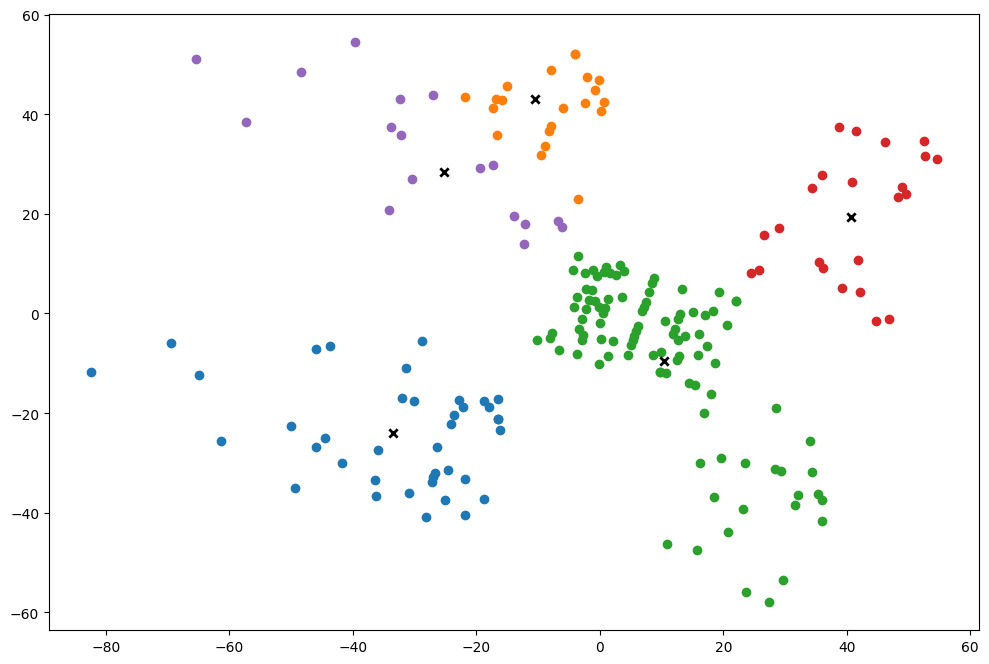

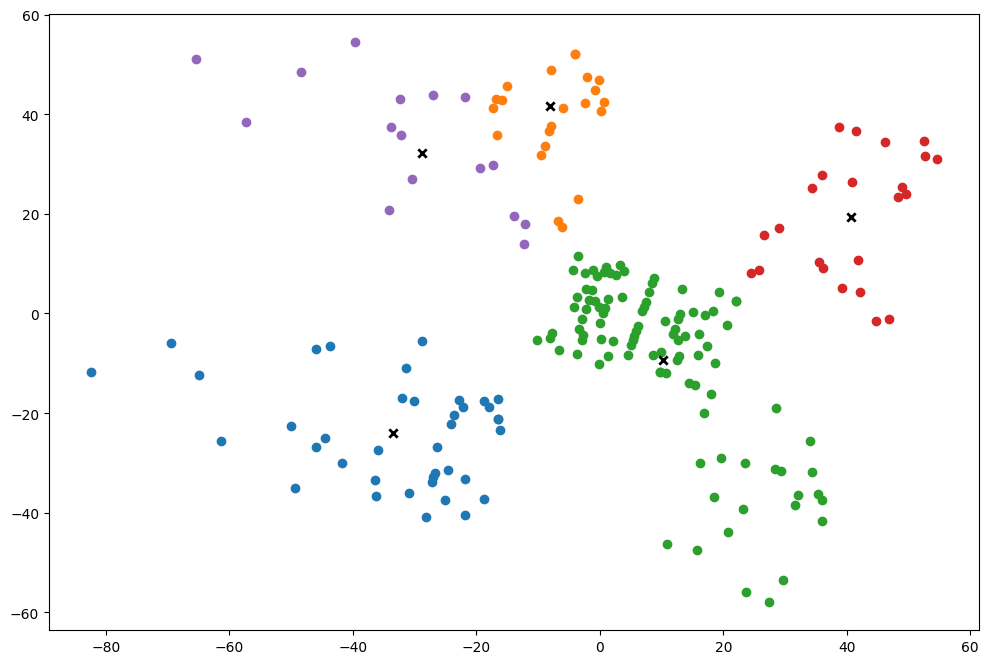

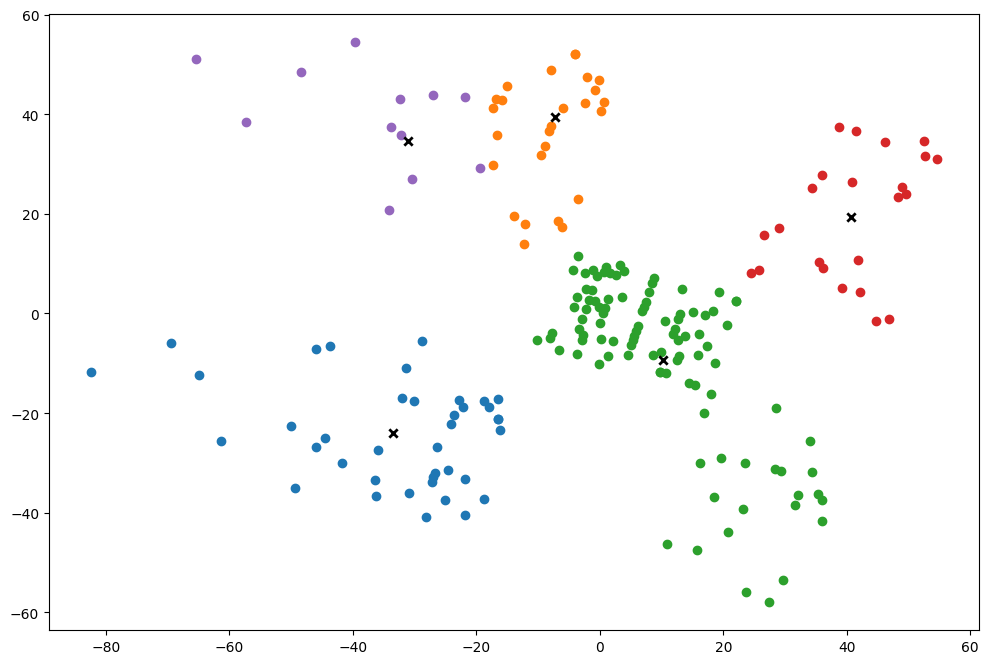

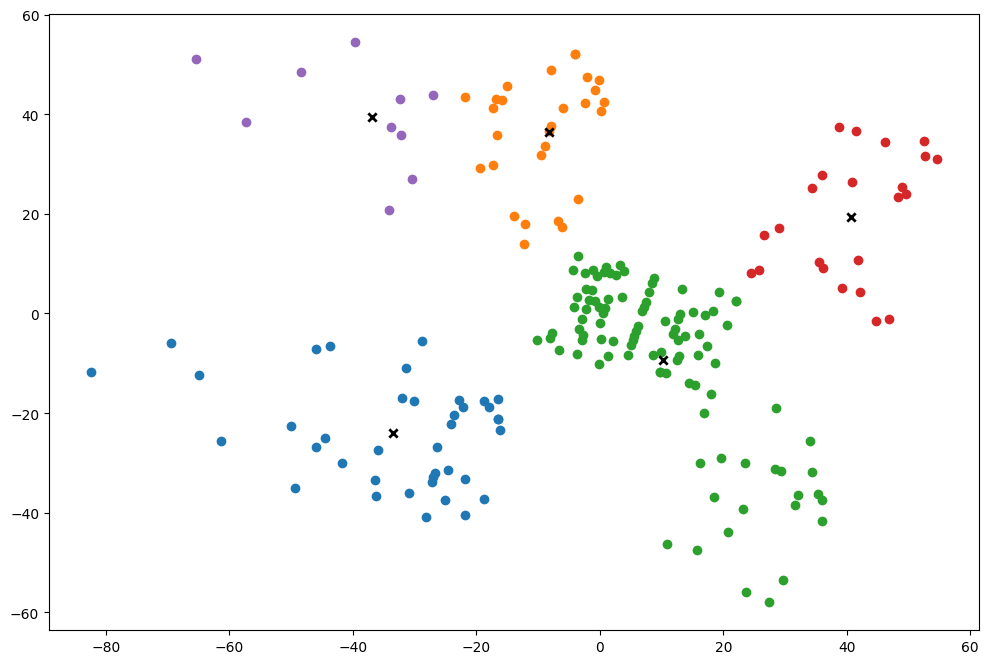

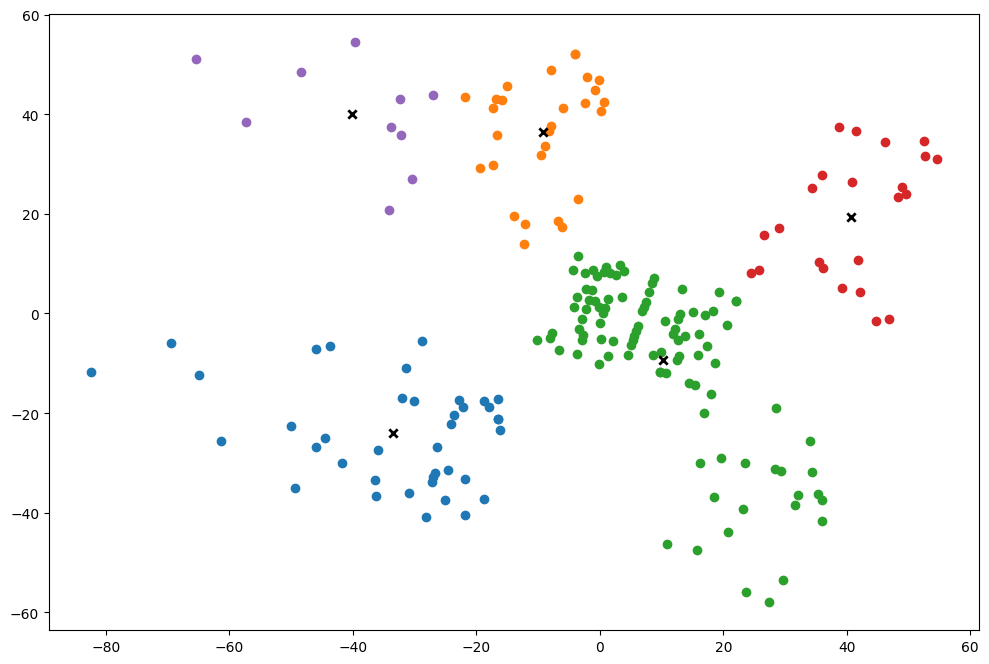

In [104]:
y_pred = Model.predict(X)

Comparison with Kmeans ++

In [91]:
class KMeansPlusPlus:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps


    def initialize_centroids(self, X):
        """
        Initialize centroids using the KMeans++ method.
        """
        n_samples, _ = X.shape
        centroids = []

        # Randomly choose the first centroid
        idx = np.random.randint(n_samples)
        centroids.append(X[idx])

        # choose remaining K-1 centroids
        for _ in range(1, self.K):
            # compute the squared distances from each point to its closest centroid
            distances = np.array([min(self.euclidean_distance(elt, centroid) for centroid in centroids) for elt in X])
            # compute the probability distribution
            probs = distances / distances.sum()
            # choose the next centroid based on probabilities
            next_idx = np.random.choice(n_samples, p=probs)
            centroids.append(X[next_idx])

        return np.array(centroids)

    
    # Compute the distance
    def euclidean_distance(self, a, b):
        return np.sqrt(np.sum((a-b)**2, axis =0))

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialization
        self.centroids = self.initialize_centroids(X)
        # Optimize clusters
        for i in range(self.max_iters):
          self.clusters = self._create_clusters(self.centroids)
          if self.plot_steps:
            self.plot()

        # Classify samples as the index of their clusters

          centroids_old = self.centroids
          self.centroids = self._get_centroids(self.clusters)
          if self._is_converged(centroids_old, self.centroids):
            break
        labels = self._get_cluster_labels(self.clusters)

        return labels

    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.zeros(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
          for sample_index in cluster:
            labels[sample_index] = cluster_idx

        return labels


    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
          centroid_idx = self._closest_centroid(sample, centroids)
          clusters[centroid_idx].append(idx)

        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [self.euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
          cluster
          centroid = np.mean(self.X[cluster], axis=0)
          centroids[cluster_idx] = centroid

        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [self.euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        # Plotting points for each cluster
        for i, cluster in enumerate(self.clusters):
            if len(cluster) > 0:
                points = self.X[cluster]
                ax.scatter(points[:, 0], points[:, 1])

        # Plotting centroids
        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()


In [92]:
Model1 =  KMeansPlusPlus(K = 5, max_iters = 2000, plot_steps = True)

In [93]:
X = pca(X, 2)

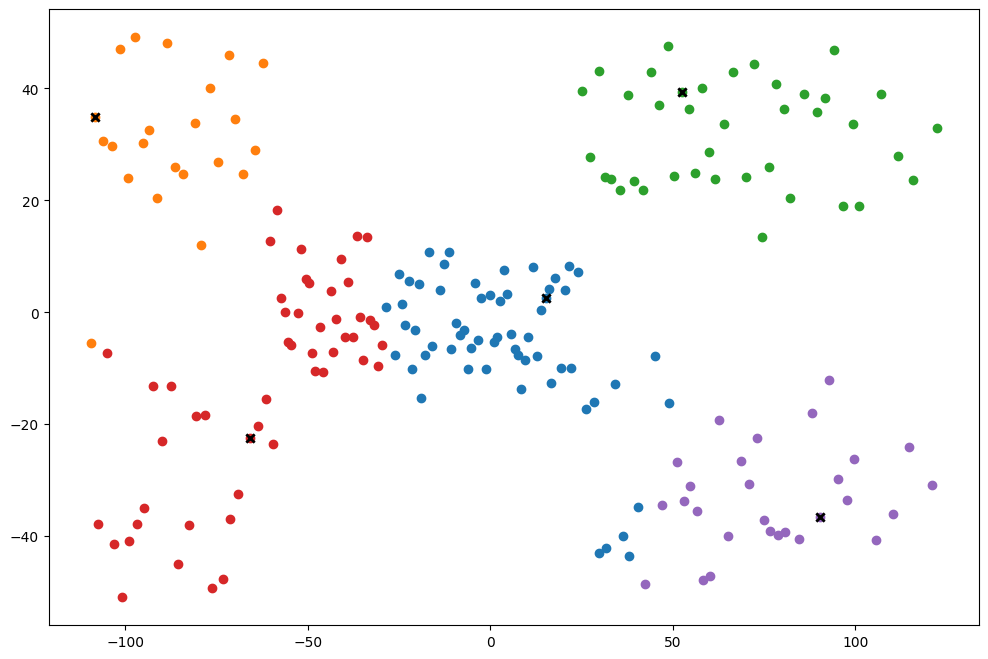

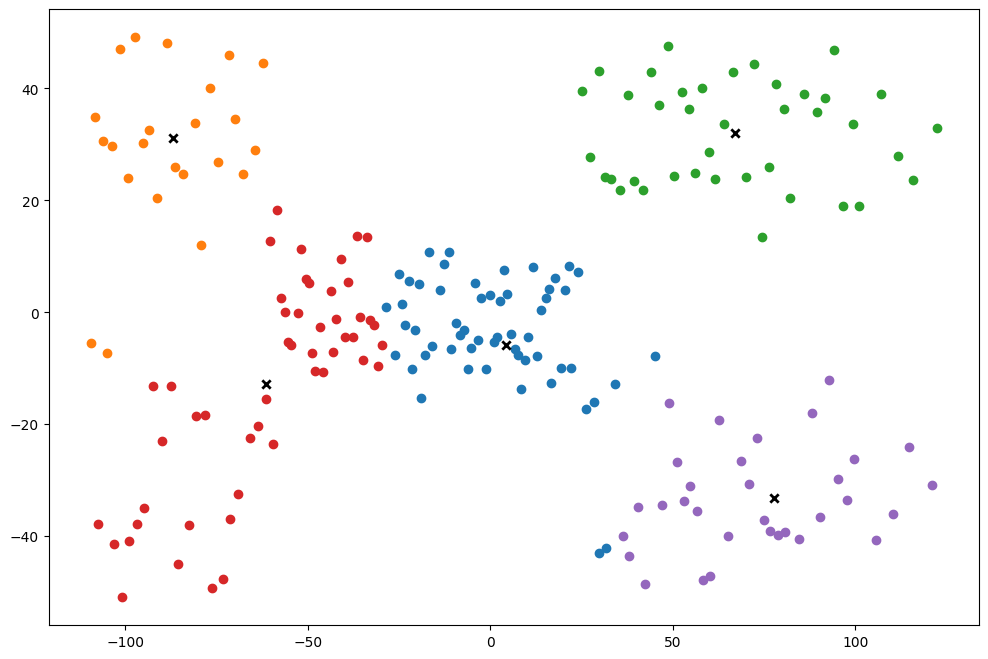

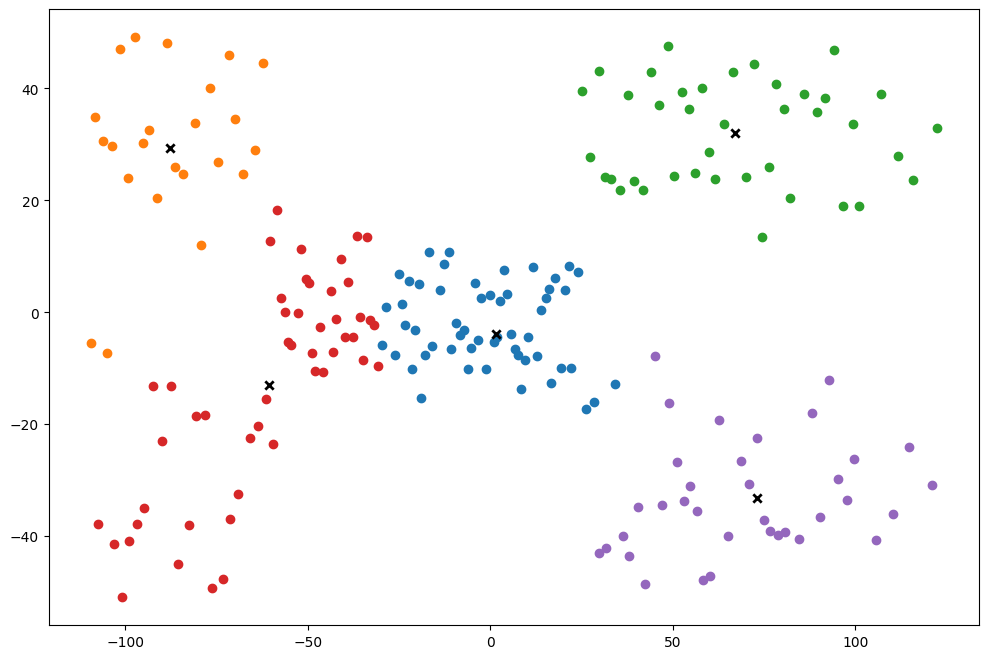

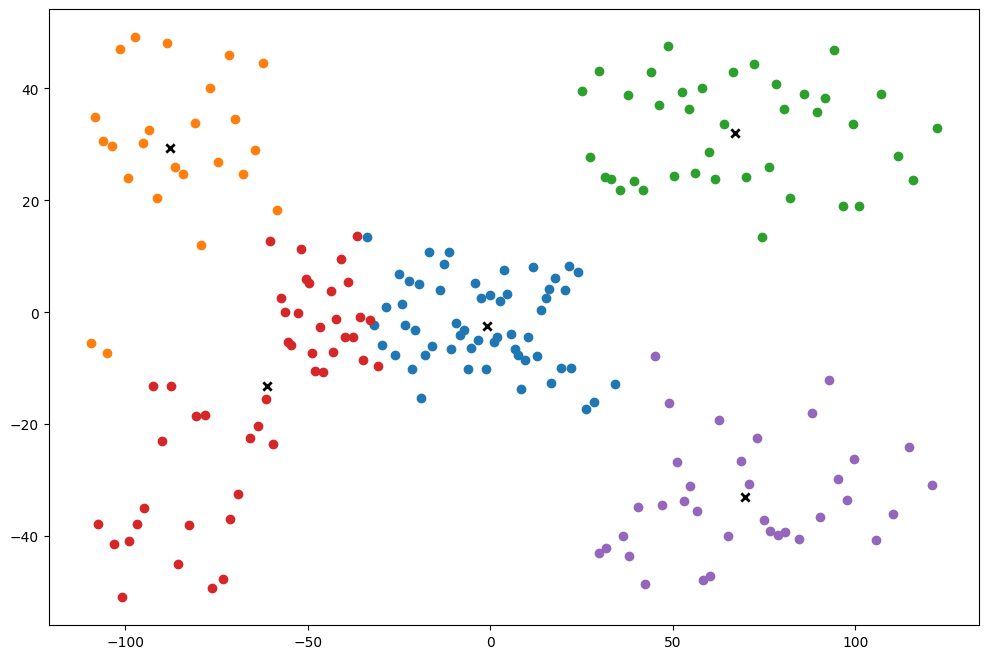

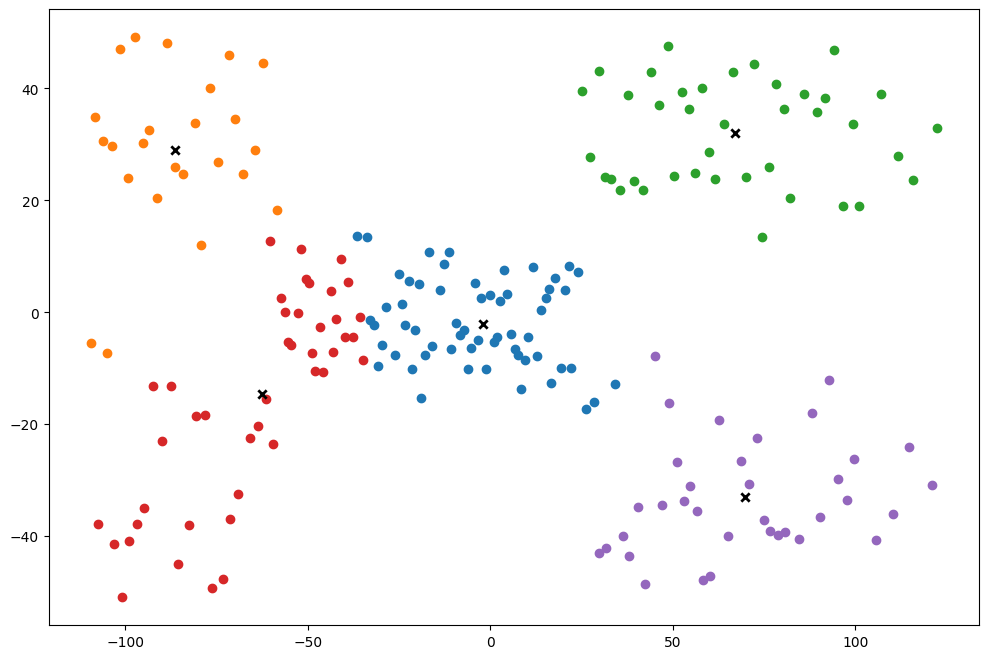

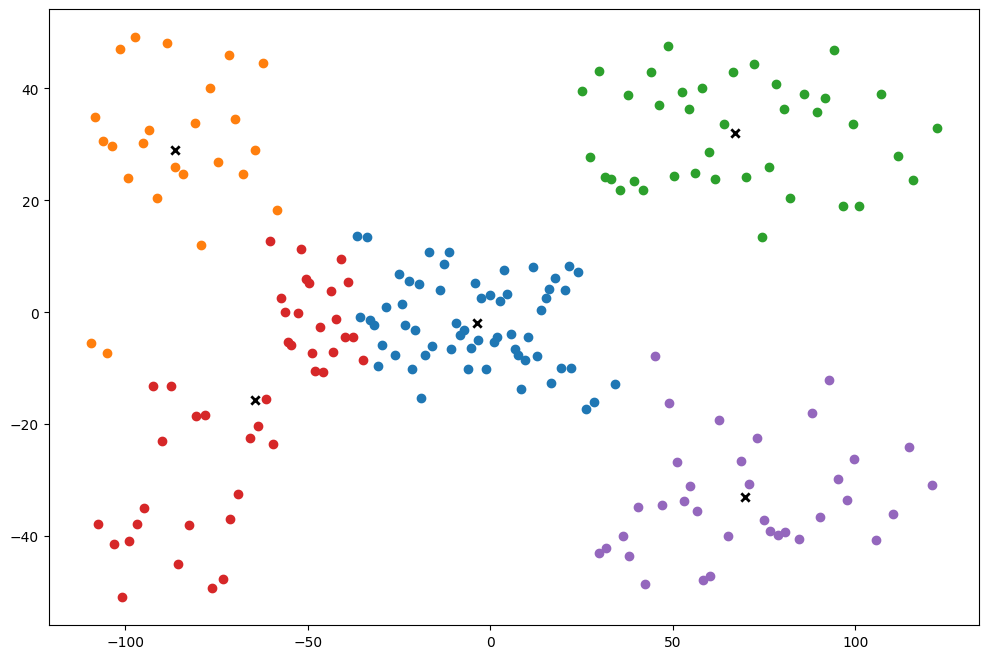

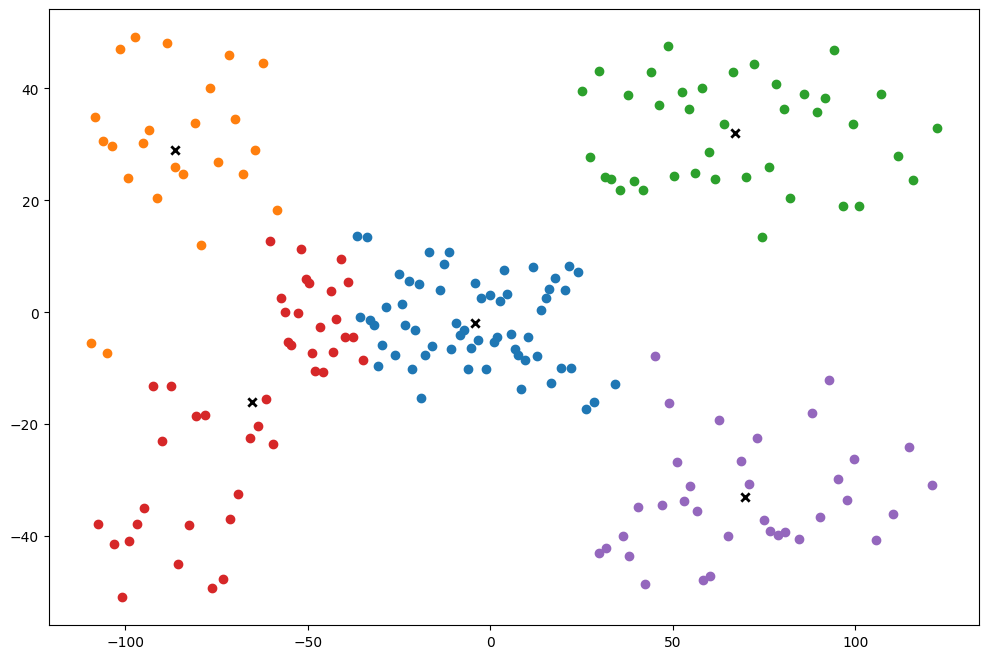

In [94]:
y_pred = Model1.predict(X)

Comparison with Sklearn

In [95]:

import sklearn
print(sklearn.__version__)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def run_sklearn_kmeans_from_csv(
    csv_path='/Users/mahamatabakarassouna/Documents/Kmeans_Assgnt/Kmeans_FML/Mall_Customers.csv', 
    K=5, 
    max_iters=100, 
    plot_steps=False, 
    selected_columns=None, 
    output_csv_path="resultats_clusters.csv", 
    random_state=42
):
    
    # Import data
    df = pd.read_csv(csv_path)
    df = df.drop(columns = "Gender")

    # Choose relevant columsn
    if selected_columns is not None:
        data = df[selected_columns].values
    else:
        data = df.select_dtypes(include=[np.number]).values  # Keep only columns with values
    # Standardarise data
    X = StandardScaler().fit_transform(data)

    # Apply KMeans
    kmeans = KMeans(n_clusters=K, max_iter=max_iters, n_init='auto', random_state=random_state)
    kmeans.fit(X)

    #Get sklearn results
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_

    # Print the comparison results
    print("=== sklearn.cluster.KMeans Results ===")
    print("Cluster Centers:\n", centroids)
    print("Inertia:", inertia)
    print("Assignments (first 10 labels):", labels[:10])


    # Add labels to DataFrame
    df['Cluster'] = labels

    # Save rersult
    df.to_csv(output_csv_path, index=False)

    # Plot data in 2D. To do so, we can consider x_pca from PCA
    X_pca = pca(X, 2)
    if plot_steps and X_pca.shape[1] == 2:
        plt.figure(figsize=(10, 6))
        for i in range(K):
            plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i}')
        plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
        plt.title('KMeans clustering result')
        plt.legend()
        plt.show()

    


    return df


1.6.1


=== sklearn.cluster.KMeans Results ===
Cluster Centers:
 [[ 1.08616125 -0.49056525 -0.39717443]
 [-0.42880597  0.97484722  1.21608539]
 [-0.96249203 -0.78476346  0.39202966]
 [ 0.03720536  0.99011499 -1.18875705]]
Inertia: 205.2251474767592
Assignments (first 10 labels): [2 2 2 2 2 2 0 2 0 2]


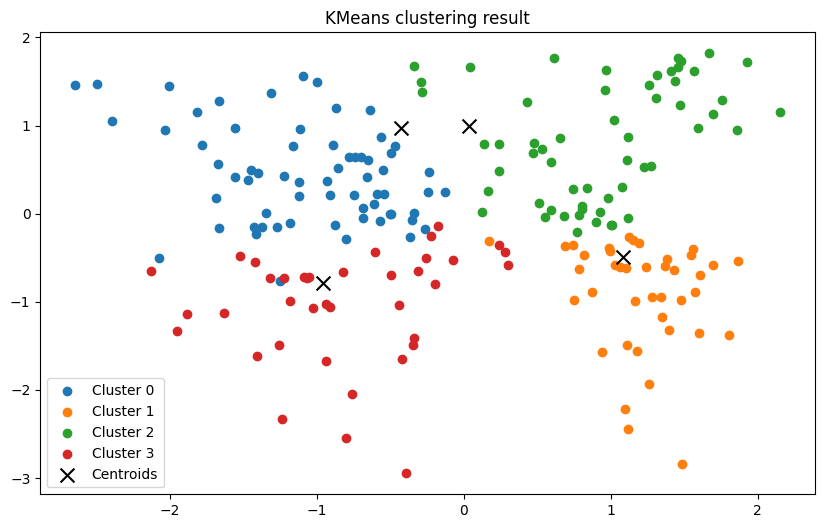

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,2
1,2,21,15,81,2
2,3,20,16,6,2
3,4,23,16,77,2
4,5,31,17,40,2
...,...,...,...,...,...
195,196,35,120,79,1
196,197,45,126,28,3
197,198,32,126,74,1
198,199,32,137,18,3


In [96]:
# Apply KMeans with the data CSV
df_result = run_sklearn_kmeans_from_csv(K=4,
    max_iters=200,
    plot_steps=True,
    selected_columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'],  
    output_csv_path="resultats_clusters.csv"
)
df_result

Elbow method with Sklearn

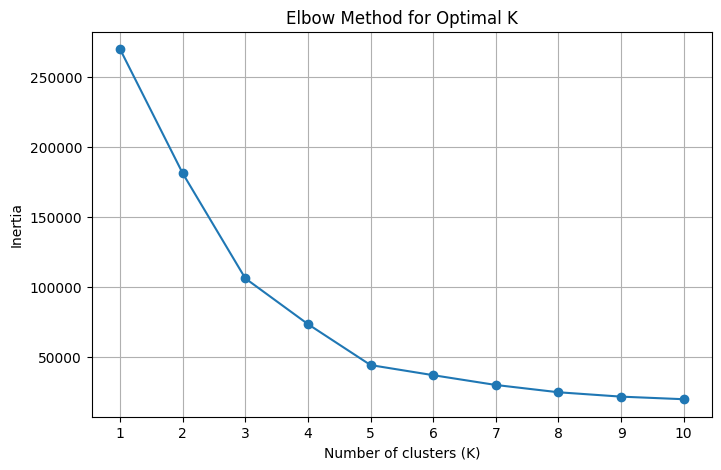

In [97]:
#  Load your dataset
df = pd.read_csv("/Users/mahamatabakarassouna/Documents/Kmeans_Assgnt/Kmeans_FML/Mall_Customers.csv")

# Select the features we want to use
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values  # Adjust as needed

# Elbow method: test K from 1 to 10
inertia_values = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia_values, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.xticks(K_range)
plt.grid(True)
plt.show()


Observation: 

From K=1 to K=5, inertia drops steeply.
After K=5, the rate of decrease in inertia slows down significantly which indicating diminishing returns in clustering performance.

Therefore, the optimal number of clusters (K) is 5.